In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import constants as cs
from astropy import units as un
import sys
sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from Paolo_class import GCphasespace
from GC_Orbit_class import GCorbit

%matplotlib inline

In [2]:
### import data of simulation with IMBH ###
if 0:
    r_3d,m1,m2,x,y,z=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)
elif 1:
    r_3d,m1,m2,x,y,z=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)
else:
    r_3d,m1,m2,x,y,z=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)

In [3]:
### import data for simulation w/o IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_sophia_neu.dat', usecols=(1,9,10,29,30,31), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [4]:
### initialize phasespace objects ###
wobh=GCphasespace(r_3d_wo,bin_num=20)
bh=GCphasespace(r_3d,bin_num=20)


In [5]:
### load half light and half mass radii for both simulations ###
hmr_bh,hlr_bh,hmr_wo_bh,hlr_wo_bh=np.loadtxt('half_mass_and_half_light_radius')

In [6]:
### take IMBH out of data ###
mges=np.sum(m1+m2)
r3d0=r_3d[0]
m10=m1[0]
m20=m2[0]
x0=x[0]
y0=y[0]
z0=z[0]

r_3d=r_3d[1:]
m1=m1[1:]
m2=m2[1:]
x=x[1:]
y=y[1:]
z=z[1:]

In [7]:
### calculate mean density and its mean radius and save them ###
r_dens_bh,dens_bh=bh.density(r_3d,m1,m2,r_3d[300],np.max(r_3d),step=20) 
r_dens_wobh,dens_wobh=wobh.density(r_3d_wo,m1_wo,m2_wo,r_3d_wo[300],np.max(r_3d_wo),step=20) 

np.savetxt('densityfile.txt',(r_dens_bh,dens_bh))
np.savetxt('densityfile_wobh.txt',(r_dens_wobh,dens_wobh))


In [8]:
### calculate distance over effective radius ###
r_plot_bh=r_dens_bh/hlr_bh
r_plot_wobh= r_dens_wobh/hlr_wo_bh

In [9]:
### initialize orbit objects ###
orb_bh=GCorbit(inputfilename='densityfile.txt',bhmass_M_sun=m10+m20)
orb_wobh=GCorbit(inputfilename='densityfile_wobh.txt')

/home/sophia/bachelor_thesis_ipython_notebooks/GC_Orbit_class.py:68: RuntimeWarning: overflow encountered in exp
  density= np.exp(self.s(np.log(r)))


In [10]:
### interpolate density ###
intpol_dens_bh=orb_bh.density(r_3d)
intpol_dens_wobh=orb_wobh.density(r_3d_wo)

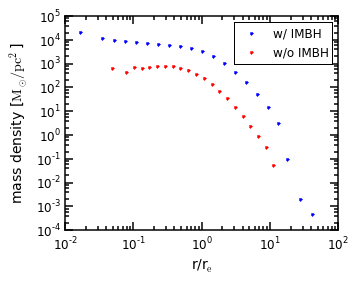

In [11]:
### plot both densities over r over effective radius ###
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
#ax2 = ax1.twiny()

ax1.loglog(r_plot_bh,dens_bh,'b.',label='w/ IMBH')
ax1.loglog(r_plot_wobh,dens_wobh,'r.', label='w/o IMBH')
ax1.legend(loc=0,numpoints=1)

#ax1.set_xlim(0.01,100)
#ax1.set_ylim(0.00001,1000000)
ax1.set_xlabel('r/r$_\mathrm{e}$',fontsize=14)
ax1.set_ylabel('mass density [$\mathrm{M}_\odot/\mathrm{pc}^2$]',fontsize=14)

#ax2.set_xlim((0.01/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi)) #calculates x limits from parsec to arcsec
#ax2.set_xscale('log')
#ax2.set_xlabel('mean distance from center [arcsec]',fontsize=14)

#fig.savefig('3d density profile numerical fit without imbh')
ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
#ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
#ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

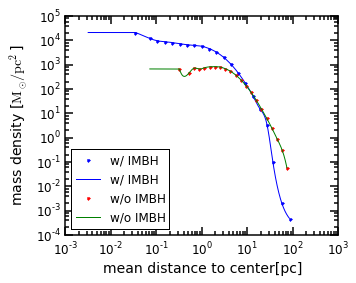

In [12]:
### plot both densities and interpolations over r ###
fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
#ax2 = ax1.twiny()

ax1.loglog(r_dens_bh,dens_bh,'b.',r_3d,intpol_dens_bh,label='w/ IMBH')
ax1.loglog(r_dens_wobh,dens_wobh,'r.',r_3d_wo,intpol_dens_wobh, label='w/o IMBH')
ax1.legend(loc=0,numpoints=1)

#ax1.set_xlim(0.01,100)
#ax1.set_ylim(0.00001,1000000)
ax1.set_xlabel('mean distance to center[pc]',fontsize=14)
ax1.set_ylabel('mass density [$\mathrm{M}_\odot/\mathrm{pc}^2$]',fontsize=14)

#ax2.set_xlim((0.01/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi)) #calculates x limits from parsec to arcsec
#ax2.set_xscale('log')
#ax2.set_xlabel('mean distance from center [arcsec]',fontsize=14)

#fig.savefig('3d density profile numerical fit without imbh')
ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
#ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
#ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()